<a href="https://colab.research.google.com/github/mankatop/hzhzhzh/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обязательно к внимательному прочтению

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ссылка на папку с базами. **Добавьте ярлык этой папки себе на диск, прежде чам продолжить.**

https://clck.ru/Y4QiL

Подключите гугл диск перед продолжением.

# Импортируем библиотеку

In [ ]:
import pandas as pd

# Загрузка файла и получение информации о таблице

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Таблицы/hh.csv')
data.head(15)

In [ ]:
data.info()

# Удаление столбцов

## Получим список столбцов и выберем столбцы, которые хотим удалить.

In [ ]:
data.columns

In [ ]:
data.columns[[0, 3, 7, 8, 9]]

## Удалим столбцы

Удаление столбцов происходит с помощью метода **drop**. Не забудьте пересохранить таблицу в ту же самую переменную. 

**ВНИМАНИЕ!!! Не запусткайте эту ячейку несколько раз, а то удалите и нужные столбцы!**

In [ ]:
data = data.drop(data.columns[[0, 3, 7, 8, 9]], axis=1, errors='ignore')
data.head()

In [ ]:
data_temp = data.copy()
data_temp.head()

In [ ]:
data_temp = data_temp.drop(data_temp.columns[[0, 1]], axis=1)
data_temp.head()

In [ ]:
data_temp = data_temp.drop(data_temp.columns[[0, 1]], axis=1)
data_temp.head()

Как видите, при запуске одного и того же кода несолько раз, всегда удаляются первые два столбца. Я удалю эту временную таблицу, чтоб она не занимала места в памяти.

In [ ]:
del data_temp

# Подготовка данных

Сейчас будет долгий процесс подготовки данных. Я немного упрощу подготовку, чтоб было проще, но постараюсь показать все необходимые методы.

### Поиск пустых ячеек

Для определения пустых ячеек используйте метод **isna**. Он вернет ту же самую таблицу, где в ячейках с данными будет стоять **False**, а в пустых ячейках **True**.

In [ ]:
data.isna()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
66940,False,False,False,False,False,False,False,False
66941,False,False,False,False,False,False,False,False
66942,False,False,False,False,False,False,False,False
66943,False,False,False,False,False,False,False,False


Так как мы не можем полностью видеть таблицу, мы не можем сказать точно, затесалась ли у нас где-нибудь пустая ячейка или нет. Мы можем найти сумму каждого столбца для этого.

In [ ]:
data.isna().sum(axis=0)

Пол, возраст         0
ЗП                   0
Город                0
Занятость            0
График               0
Образование и ВУЗ    0
Обновление резюме    0
Авто                 0
dtype: int64

Нам повезло, в столбцах нет пустых ячеек. Если бы были, мы должны были-бы их аполнить методом **fillna**. В скобках метода надо указать, чем заполнить пропуски. Выглядит это так.

In [ ]:
data = data.fillna(0)

## Фильтрация

Давайте еще раз взглянем на таблицу, чтоб вспомнить, что она в себе содержит.

In [ ]:
data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 42 года , родился 6 октября 1976",27 000 руб.,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,Среднее специальное образование 1994 Спту 26,28.04.2019 12:17,Имеется собственный автомобиль
1,"Мужчина , 41 год , родился 14 января 1978",60 000 руб.,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",Высшее образование 1999 СОЧИНСКИЙ ГОС. УНИВЕР...,28.04.2019 11:44,Не указано
2,"Мужчина , 44 года , родился 21 февраля 1975",65 000 руб.,"Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",Высшее образование 2003 Московский государств...,28.04.2019 10:36,Не указано
3,"Мужчина , 43 года , родился 9 февраля 1976",70 000 руб.,"Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день",Высшее образование 2002 Российский государств...,28.04.2019 10:29,Не указано
4,"Мужчина , 39 лет , родился 14 июня 1979",45 000 руб.,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",Высшее образование 2007 Российский государств...,28.04.2019 10:15,Не указано


Во первых, в нашей базе есть зарплата не в рублях. Давайте оставим только зарплату в рублях. Для фильтрации есть несколько неспособов. Давайте рассмотрим их все. Первый способ очень похож на фильтрацию NumPy массивов. Давайте оставим только те строки, в которых значение в столбце **Авто** не равно **Не указано**.

In [ ]:
data = data[data['Авто'] != 'Не указано']

Плюс этого метода в том, что мы можем фильтровать таким образом любые данные. Строки, числа или любой другой тип данных, который нам попадется. Но если нам надо проверить, Содержит ли строка какую-то подстроку, то такая фильтрация не подойдет. В этом случае нужно использовать метод **str.contains**. Для эксперимента, давайте оставим только людей из Москвы.

In [ ]:
data = data[data['Город'].str.contains('Ханты')]

Сам массив при этом не меняется.

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 42 года , родился 6 октября 1976",27 000 руб.,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,Среднее специальное образование 1994 Спту 26,28.04.2019 12:17,Имеется собственный автомобиль
1,"Мужчина , 41 год , родился 14 января 1978",60 000 руб.,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",Высшее образование 1999 СОЧИНСКИЙ ГОС. УНИВЕР...,28.04.2019 11:44,Не указано
2,"Мужчина , 44 года , родился 21 февраля 1975",65 000 руб.,"Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",Высшее образование 2003 Московский государств...,28.04.2019 10:36,Не указано
3,"Мужчина , 43 года , родился 9 февраля 1976",70 000 руб.,"Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день",Высшее образование 2002 Российский государств...,28.04.2019 10:29,Не указано
4,"Мужчина , 39 лет , родился 14 июня 1979",45 000 руб.,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",Высшее образование 2007 Российский государств...,28.04.2019 10:15,Не указано


Нам нужно оставить только те строки, которые содержат в себе подстроку **руб**. Попробуйте сделать это самостоятельно. После фильтрации сохраните результат в ту же переменную.

In [ ]:
temp = data.copy()
#temp.head()
data = data[~data['ЗП'].str.contains('бел')]

data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто
1428,0,100000 руб.,"Ханты-Мансийск , готова к переезду , готова к ...","частичная занятость, проектная работа, полная...","гибкий график, полный день, удаленная работа",3,26.04.2019 09:53,Имеется собственный автомобиль
2282,1,90000 руб.,"Москва , м. Щелковская , готов к переезду (Са...",полная занятость,"гибкий график, полный день, сменный график, в...",3,25.04.2019 19:55,Имеется собственный автомобиль
6289,1,40000 руб.,"Тюмень , готов к переезду (Новосибирск, Ямало-...",полная занятость,полный день,1,22.04.2019 10:53,Имеется собственный автомобиль
15714,1,170000 руб.,"Сургут , готов к переезду (Москва, Ханты-Манси...",полная занятость,полный день,3,07.05.2019 09:19,Имеется собственный автомобиль
17011,1,100000 руб.,"Ноябрьск , готов к переезду (Москва, Омская об...",полная занятость,"полный день, сменный график",3,07.05.2019 06:06,Имеется собственный автомобиль


## Обработка столбцов

Нейросеть может работать только с числовыми данными. Поэтому сейчас перед нами стоит трудный и долгий процесс по преобразованию данных. Для начала, давайте преобазуем столбец **Пол, возраст**. Оставим в нем только пол и закодируем их числами **0** и **1**. Если пол не указан, запишем в столбец **-1** Для этого мы напишем функцию, которая принимает на вход строку и возвращает 0, если в столбце есть слово "Женщина", 1 для "Мужчина" и -1 если ничего не найдем.

In [ ]:
def gender(line):
  if 'Женщина' in line:
    return 0
  if 'Мужчина' in line:
    return 1
  return -1

Для того чтоб применить функцию к столбцу, нужно использовать метод **apply**. В скобках указывается название функции, которую мы хотим применить.

In [ ]:
data['Пол, возраст'] = data['Пол, возраст'].apply(gender)
data.head()

TypeError: ignored

Попробуйте самостоятельно преобразовать столбцы **ЗП и Образование и ВУЗ**. В столбце **ЗП** вы должны вернуть сумму в виде числа (для того чтоб убрать пробел между числами используйте **replace('\xa0', '')**). В столбце **Образование и ВУЗ** замените:
- Среднее образование на 0
- Среднее специальное на 1
- Неоконченное высшее на 2
- Высшее образование на 3
- остальное на -1

In [ ]:
def vuz(line):
  if "Среднее образование" in line:
    return 0
  if "Среднее специальное" in line:
    return 1
  if "Неоконченное высшее" in line:
    return 2
  if "Высшее образование" in line:
    return 3
  else:
    return -1
def salary(line):
  answer = int(line.replace('\xa0', "").replace("руб.", ""))
  return answer


#data["Образование и ВУЗ"] = data["Образование и ВУЗ"].apply(vuz)
data['ЗП'] = data["ЗП"].apply(salary)
data.head()

ValueError: ignored

In [ ]:
data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто
1428,0,100000 руб.,"Ханты-Мансийск , готова к переезду , готова к ...","частичная занятость, проектная работа, полная...","гибкий график, полный день, удаленная работа",3,26.04.2019 09:53,Имеется собственный автомобиль
2282,1,90000 руб.,"Москва , м. Щелковская , готов к переезду (Са...",полная занятость,"гибкий график, полный день, сменный график, в...",3,25.04.2019 19:55,Имеется собственный автомобиль
6289,1,40000 руб.,"Тюмень , готов к переезду (Новосибирск, Ямало-...",полная занятость,полный день,1,22.04.2019 10:53,Имеется собственный автомобиль
15714,1,170000 руб.,"Сургут , готов к переезду (Москва, Ханты-Манси...",полная занятость,полный день,3,07.05.2019 09:19,Имеется собственный автомобиль
17011,1,100000 руб.,"Ноябрьск , готов к переезду (Москва, Омская об...",полная занятость,"полный день, сменный график",3,07.05.2019 06:06,Имеется собственный автомобиль


## Получение уникальных значений столбца.

Пока мы знали, что ожидать в столбцах, но ситуация не всегда так хороша. Но мы всегда можем достать из столбца все уникальные значения, чтоб придумать, как их закодировать. Это деается с помощью метода **unique**. Давайте сделаем это для столбца **Авто**.

In [ ]:
data['Авто'].unique()

array(['Имеется собственный автомобиль'], dtype=object)

Как видите, столбец имеет всего 2 значения. Самостоятельно закодируйте их числами 0 и 1. 
- 1 - автомобиль есть
- 0 - не указано

In [ ]:
def auto(line):
  if "Имеется собственный автомобиль":
    return 1
  else:
    return 0
  return -1

data["Авто"] = data["Авто"].apply(auto)
data.head()


,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто,Готовность к переезду,Готовность к командировкам
1428,0,100000 .,"Ханты-Мансийск , готова к переезду , готова к ...","частичная занятость, проектная работа, полная...","гибкий график, полный день, удаленная работа",3,26.04.2019 09:53,1,1,1
2282,1,90000 .,"Москва , м. Щелковская , готов к переезду (Са...",полная занятость,"гибкий график, полный день, сменный график, в...",3,25.04.2019 19:55,1,1,1
6289,1,40000 .,"Тюмень , готов к переезду (Новосибирск, Ямало-...",полная занятость,полный день,1,22.04.2019 10:53,1,1,1
15714,1,170000 .,"Сургут , готов к переезду (Москва, Ханты-Манси...",полная занятость,полный день,3,07.05.2019 09:19,1,1,1
17011,1,100000 .,"Ноябрьск , готов к переезду (Москва, Омская об...",полная занятость,"полный день, сменный график",3,07.05.2019 06:06,1,1,1


## Преобразование столбцов с формированием новых столбцов.

Пока что, мы преобразовывали столбцы просто заменяя в них значение. Но у нас есть более сложные данные, такие как: Город, Занятость и График. Давайте создадим из столбца Город два новых столбца: готовность к переезду и готовность к командировкам со значениями 1 и 0.

В таком случае, применение **apply** будет немного отличаться. Мы должны применить функцию ко всему датасету, в функции формировать новые столбцы, а в **apply** указать ось, к которой мы применяем функцию. Так как мы хотим применить к столбцам, мы указываем **axis=1**.

In [ ]:
def city_column_transform(df):
  if 'не готова к переезду' in df['Город'] or 'не готов к переезду' in df['Город']:
    df['Готовность к переезду'] = 0
  else:
    df['Готовность к переезду'] = 1
  if 'не готова к командировкам' in df['Город'] or 'не готов к командировкам' in df['Город']:
    df['Готовность к командировкам'] = 0
  else:
    df['Готовность к командировкам'] = 1
  return df

data = data.apply(city_column_transform, axis=1)
data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто,Готовность к переезду,Готовность к командировкам,Степень занятости
1428,0,100000 .,"Ханты-Мансийск , готова к переезду , готова к ...","частичная занятость, проектная работа, полная...","гибкий график, полный день, удаленная работа",3,26.04.2019 09:53,1,1,1,3
2282,1,90000 .,"Москва , м. Щелковская , готов к переезду (Са...",полная занятость,"гибкий график, полный день, сменный график, в...",3,25.04.2019 19:55,1,1,1,3
6289,1,40000 .,"Тюмень , готов к переезду (Новосибирск, Ямало-...",полная занятость,полный день,1,22.04.2019 10:53,1,1,1,3
15714,1,170000 .,"Сургут , готов к переезду (Москва, Ханты-Манси...",полная занятость,полный день,3,07.05.2019 09:19,1,1,1,3
17011,1,100000 .,"Ноябрьск , готов к переезду (Москва, Омская об...",полная занятость,"полный день, сменный график",3,07.05.2019 06:06,1,1,1,3


Преобразуйте столбцы **Занятость** и **График** самостоятельно.

In [ ]:
#data['Занятость'].unique()
#data.head()
data['График'].unique()
#def business(line):
 # if 'стажировка' in line['Занятость']:
  #  line['Степень занятости'] = 0
  #if 'проектная работа' in line['Занятость']:
   # line['Степень занятости'] = 1
  #if 'частичная занятость' in line ['Занятость']:
   # line['Степень занятости'] = 2
  #if 'полная занятость' in line['Занятость']:
   # line['Степень занятости'] = 3
  #return line

def graphic(line):
  if 'сменный график' in line['Занятость']:
    line ['Вид графика работы'] = 0
  if 'вахтовый метод' in line['Занятость']:
    line ['Вид графика работы'] = 1
  if 'удаленная работа' in line ['Занятость']:
    line ['Вид графика работы'] = 2
  if 'гибкий график' in line ['Занятость']
#data = data.apply(business, axis=1)





array([' гибкий график, полный день, удаленная работа',
       ' гибкий график, полный день, сменный график, вахтовый метод',
       ' полный день', ' полный день, сменный график',
       ' удаленная работа, полный день, вахтовый метод',
       ' полный день, вахтовый метод',
       ' гибкий график, полный день, сменный график, вахтовый метод, удаленная работа',
       ' гибкий график, полный день, сменный график, удаленная работа'],
      dtype=object)

# Еще немного возможностей Pandas

## Создание новых столбцов

In [ ]:
# создаст новый столбец заполненный нулями
data['new_coluns'] = 0
data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто,Готовность к переезду,Готовность к командировкам,new_coluns
0,1,27000,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,1,28.04.2019 12:17,1,0,0,0
1,1,60000,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",3,28.04.2019 11:44,0,0,0,0
2,1,65000,"Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",3,28.04.2019 10:36,0,0,0,0
3,1,70000,"Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день",3,28.04.2019 10:29,0,0,0,0
4,1,45000,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",3,28.04.2019 10:15,0,0,0,0


In [ ]:
# создаст новый столбец равный произведению столбца ЗП на столбец Образование
data['new_coluns'] = data['ЗП'] * data['Образование и ВУЗ']
data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто,Готовность к переезду,Готовность к командировкам,Степень занятости,new_coluns
1428,0,100000 .,"Ханты-Мансийск , готова к переезду , готова к ...","частичная занятость, проектная работа, полная...","гибкий график, полный день, удаленная работа",3,26.04.2019 09:53,1,1,1,3,100000 .100000 .100000 .
2282,1,90000 .,"Москва , м. Щелковская , готов к переезду (Са...",полная занятость,"гибкий график, полный день, сменный график, в...",3,25.04.2019 19:55,1,1,1,3,90000 .90000 .90000 .
6289,1,40000 .,"Тюмень , готов к переезду (Новосибирск, Ямало-...",полная занятость,полный день,1,22.04.2019 10:53,1,1,1,3,40000 .
15714,1,170000 .,"Сургут , готов к переезду (Москва, Ханты-Манси...",полная занятость,полный день,3,07.05.2019 09:19,1,1,1,3,170000 .170000 .170000 .
17011,1,100000 .,"Ноябрьск , готов к переезду (Москва, Омская об...",полная занятость,"полный день, сменный график",3,07.05.2019 06:06,1,1,1,3,100000 .100000 .100000 .


## Групировка данных

Мы можем группировать данные и считать разные метрики для каждого из столбцов.

In [ ]:
data.groupby('Пол, возраст').mean().head()

,ЗП,Образование и ВУЗ,Авто,Готовность к переезду,Готовность к командировкам,new_coluns
"Пол, возраст",,,,,,
0,60082.622315,2.600999,0.151540,0.0,0.0,166032.107577
1,80905.545539,2.499613,0.300645,0.0,0.0,216574.177077


In [ ]:
data.groupby('Пол, возраст').agg({'ЗП':'mean', 'Город':'count'}).head()

,ЗП,Город
"Пол, возраст",,
0,60082.622315,12010
1,80905.545539,50385


In [ ]:
data.groupby(['Пол, возраст', 'Образование и ВУЗ']).agg({'ЗП':'mean', 'Город':'count'})

ЗП  Город
Пол, возраст Образование и ВУЗ                      
0            -1                 150000.000000      1
              0                  32896.436526    449
              1                  33575.481452   1267
              2                  44916.758545    907
              3                  66417.234072   9386
1            -1                  40000.000000      1
              0                  50874.746977   2150
              1                  47365.707023   6707
              2                  66153.089820   5344
              3                  91087.010392  36183

## Матрица корреляции

### Немного о понятии корреляции

**Корреляция (от латинского «correlatio» – соотношение, взаимосвязь)** – математический термин, который означает меру статистической вероятностной зависимости между случайными величинами (переменными).

Корреляция может быть:
- сильной
- слабой
- отсутствовать

**Сильная корреляция** между случайными величинами – свидетельство наличия некоторой статистической связи конкретно между этими явлениями, но эта связь не может переноситься на эти же явления, но для другой ситуации.

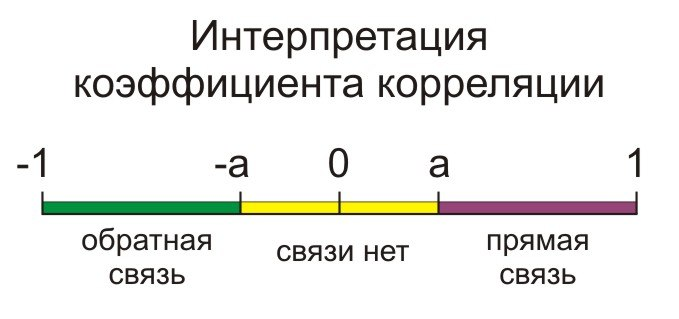

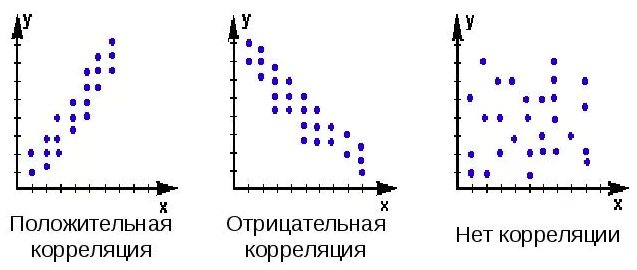

**Но!!! Не всегда можно верить графикам! Всегда нужно включать голову!**



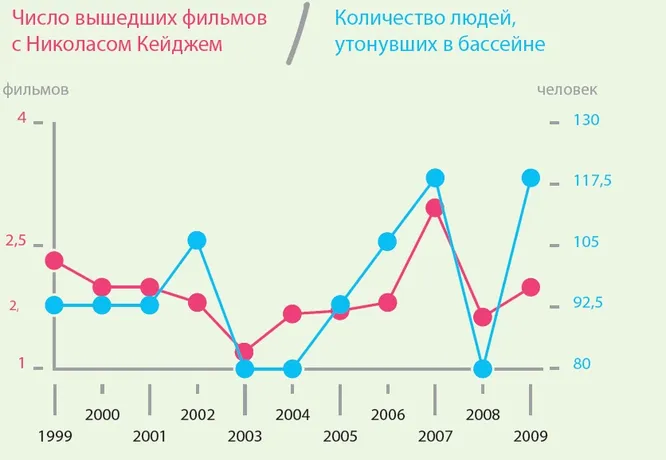

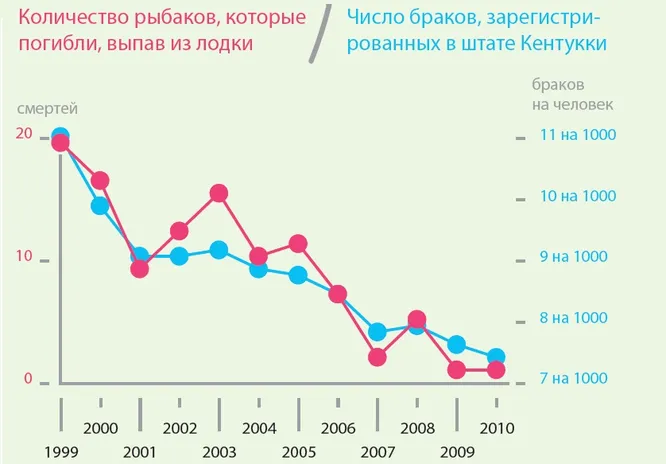

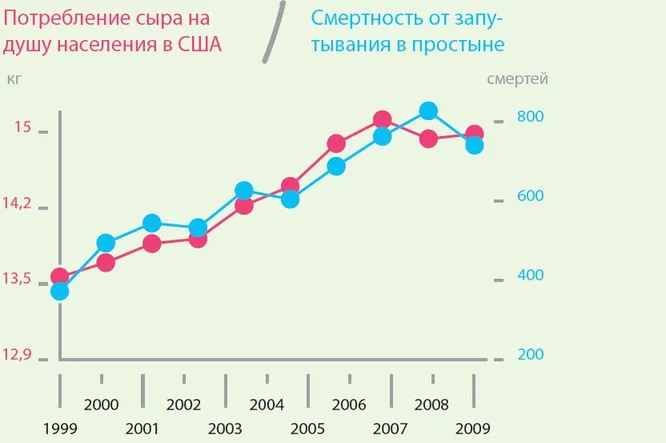

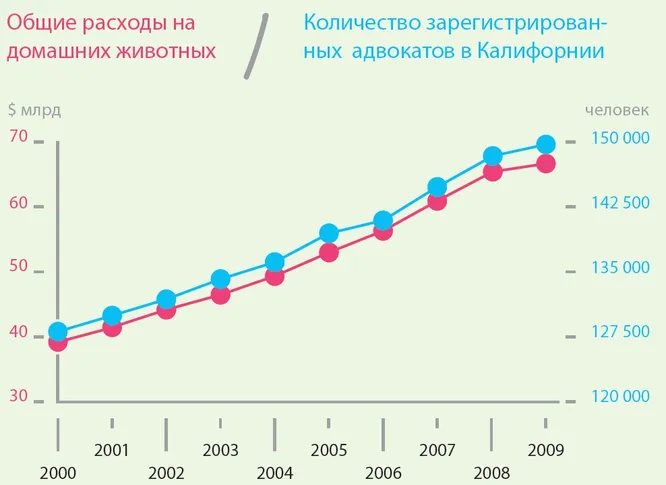

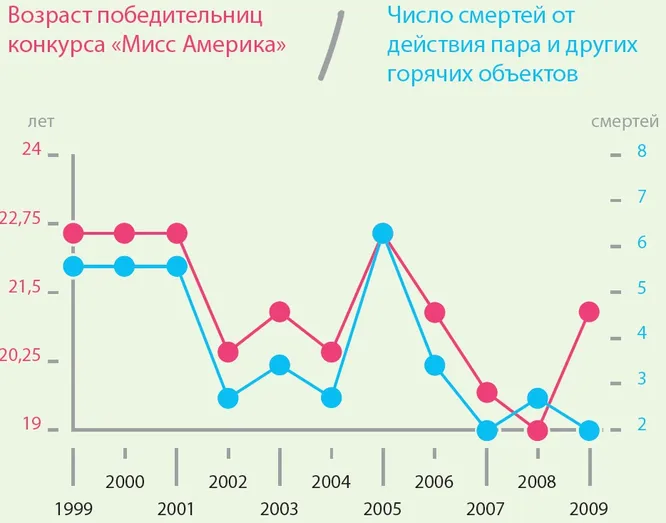

### Построение таблицы корреляции

In [ ]:
data.head()

,"Пол, возраст",ЗП,Город,Занятость,График,Образование и ВУЗ,Обновление резюме,Авто,Готовность к переезду,Готовность к командировкам,new_coluns
0,1,27000,"Липецк , не готов к переезду , не готов к кома...",полная занятость,полный день,1,28.04.2019 12:17,1,0,0,27000
1,1,60000,"Сочи , не готов к переезду , готов к командиро...","частичная занятость, полная занятость","гибкий график, полный день",3,28.04.2019 11:44,0,0,0,180000
2,1,65000,"Липецк , готов к переезду , готов к командировкам",полная занятость,"удаленная работа, полный день, вахтовый метод",3,28.04.2019 10:36,0,0,0,195000
3,1,70000,"Москва , м. Марьино , не готов к переезду , г...",полная занятость,"удаленная работа, гибкий график, полный день",3,28.04.2019 10:29,0,0,0,210000
4,1,45000,"Тула , не готов к переезду , готов к редким ко...","частичная занятость, полная занятость","полный день, сменный график",3,28.04.2019 10:15,0,0,0,135000


In [ ]:
data['Готовность к переезду'].value_counts()

0    40892
1    21503
Name: Готовность к переезду, dtype: int64

In [ ]:
data.corr()

,"Пол, возраст",ЗП,Образование и ВУЗ,Авто,Готовность к переезду,Готовность к командировкам
"Пол, возраст",1.000000,0.126291,-0.045986,0.132112,0.090582,0.095535
ЗП,0.126291,1.000000,0.232397,0.032666,0.120317,0.220350
Образование и ВУЗ,-0.045986,0.232397,1.000000,0.091803,0.103208,0.232945
Авто,0.132112,0.032666,0.091803,1.000000,0.031784,0.078314
Готовность к переезду,0.090582,0.120317,0.103208,0.031784,1.000000,0.316268
Готовность к командировкам,0.095535,0.220350,0.232945,0.078314,0.316268,1.000000
